## Main steps

For several song samples:
- load a song sample from data/Album-name/song-name-dir/startoffset-endoffset.wav
- use `librosa.core.stft()` to generate the discrete Fourier transform coefficients
- (optional) visualize the Fourier coefficients
- **save the stft to data/stft/fft-window-size_fft-hop-length/Album-name/song-name-dir/startoffset-endoffset.stft**
    - This way we can try different pitch-detection algorithms on the same stft.
- detect the one, two, or three pitches of the voices in the audio
    - each pitch will be the fundamental frequency - the lowest frequency - of the voice

### `specshow` parameters 

- sr: the sample rate of the audio
- hop_length: the hop length used by `stft`

In [4]:
import librosa.core
import librosa.display
import librosa
import matplotlib.pyplot as plt
import numpy as np

data_dir = '/Akamai/voice/data/'
sr = 44100 # should be readable from some documentation

def generate_fft (file, n_fft):
    global data_dir
    
    y, sr = librosa.load(data_dir + file)
    D = np.abs(librosa.core.stft(y, n_fft=n_fft))
    hop_length = n_fft//4 # by default, win_length = n_fft and hop_length = win_length/4
    D_left = np.abs(librosa.stft(y, n_fft=n_fft, center=False))
    D_short = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', 
                             sr=sr, hop_length=hop_length)
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()
    

### Time-Frequency Localization Tradeoff

`n_fft` is the number of samples in one "window" that `stft` uses to generate frequencies.
The default is 2048. The "time-frequency localization tradeoff" says that the more precisely the STFT discriminates neighboring impulses in time, the less precisely it will discriminate neighboring pitches, and vice versa. 

You can see this in the graphs. The bigger the `n_fft` the more precisely STFT discriminates pitches. This is good if the singer stays on pitch!

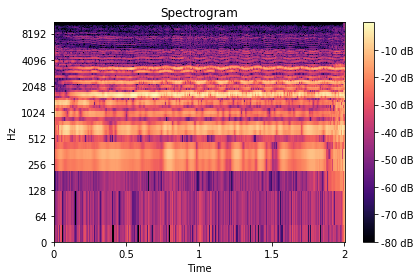

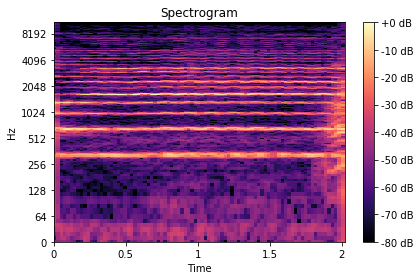

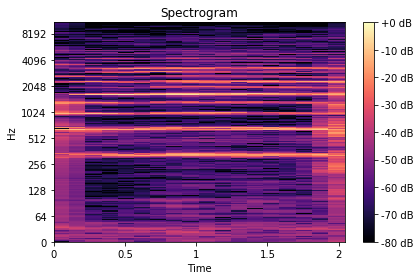

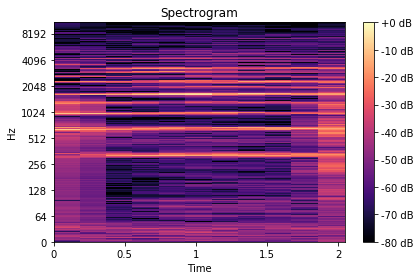

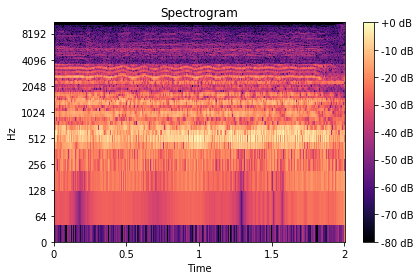

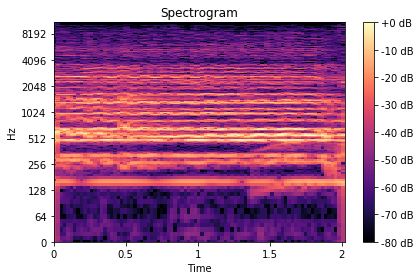

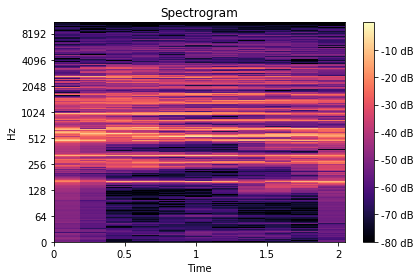

In [7]:
generate_fft("Basiani/01 Mravalzhamier/4-6.0.wav", 256)
generate_fft("Basiani/01 Mravalzhamier/4-6.0.wav", 2048)
generate_fft("Basiani/01 Mravalzhamier/4-6.0.wav", 16384)
generate_fft("Basiani/01 Mravalzhamier/65-67.wav", 256)
generate_fft("Basiani/01 Mravalzhamier/65-67.wav", 2048)
generate_fft("Basiani/01 Mravalzhamier/65-67.wav", 16384)